Python Hackathon 2025 : question 33 to 48

In [19]:
#import the CSv file
!pip install pandas
!pip install Matplotlib
!pip install ipywidgets
!pip install ydata-profiling
%matplotlib inline
!pip install psycopg2


  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl (8.0 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.1


error: uninstall-no-record-file

Cannot uninstall matplotlib 3.10.1

The package's contents are unknown: no RECORD file was found for matplotlib.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps matplotlib==3.10.1


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json



In [8]:
test_m = pd.read_csv('test_measure.csv')

In [10]:
subject_i = pd.read_csv('subject-info.csv')

In [38]:
subject_i['Sex'] = subject_i['Sex'].replace({0: 'Male', 1: 'Female'})

In [34]:
test_m.head()

,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID
0,0,5.0,63.0,478.0,360.0,27,13.3,2_1,2
1,2,5.0,75.0,401.0,295.0,23,10.3,2_1,2
2,4,5.0,82.0,449.0,319.0,29,12.2,2_1,2
3,7,5.0,87.0,461.0,340.0,28,12.8,2_1,2
4,9,5.0,92.0,574.0,417.0,28,14.6,2_1,2


In [40]:
subject_i.head()

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test
0,10.8,48.8,163.0,39.0,20.7,Female,543,543_1
1,11.8,41.0,150.0,41.0,22.3,Female,11,11_1
2,12.2,46.0,160.0,37.0,21.5,Male,829,829_1
3,13.2,71.0,190.0,49.0,23.8,Female,284,284_1
4,13.7,53.8,169.7,40.0,25.3,Male,341,341_1


Question:33.Connect to database using PostgresSQL and increase the temperature 2 degree for participant with maximum humidity and display the result

In [22]:
import psycopg2

conn = psycopg2.connect(
    dbname="subject_info",
    user="postgres",
    password="pgdb",
    host="localhost",
    port="5432"
)

cur = conn.cursor()

cur.execute("""
    SELECT ID, Humidity, Temperature
    FROM subject_info
    WHERE Temperature IS NOT NULL
    ORDER BY Humidity DESC
    LIMIT 1;
""")


result = cur.fetchone()

if result:
    id_with_max_humidity = result[0]
    max_humidity = result[1]
    current_temperature = result[2]

    print(f"Participant ID: {id_with_max_humidity}, Max Humidity: {max_humidity}, Current Temperature: {current_temperature}")

    simulated_temperature = current_temperature + 2

    print(f"Temperature increased to {simulated_temperature}° for Participant ID: {id_with_max_humidity}")

   
    cur.execute("""
        SELECT ID, Age, Weight, Height, Humidity, Temperature, Sex, ID_test
        FROM subject_info
        WHERE ID = %s;
    """, (id_with_max_humidity,))

    original_result = cur.fetchone()
    if original_result:
       
        result = list(original_result)
        result[5] = simulated_temperature  

        print("Updated participant info:")
        print(tuple(result))  

cur.close()
conn.close()


Participant ID: 9, Max Humidity: 69.0, Current Temperature: 22.0
Temperature increased to 24.0° for Participant ID: 9
Updated participant info:
(9, 24.5, 72.0, 167.0, 69.0, 24.0, '1', '9_1')


Question:34

Create an array, np.arrange.reshape(3,4). Replace the array elements with their square values if the element is an even Number.Keep the odd numbers as such. Displaying the resulting array 
            

In [126]:

arr = np.arange(12).reshape(3, 4)

result = np.where(arr % 2 == 0, arr ** 2, arr)


print("Original array:\n", arr)
print("\n Resulting array (even numbers squared):\n", result)


Original array:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

 Resulting array (even numbers squared):
 [[  0   1   4   3]
 [ 16   5  36   7]
 [ 64   9 100  11]]


Question:35

Read 10 records from dataframe and convert into Json format and print the data

In [119]:
subset_df = test_m.head(10)

# Convert the dataframe to JSON format
json_data = subset_df.to_json(orient='records')

# Print the JSON data
print(json.dumps(json.loads(json_data), indent=4))

[
    {
        "time": 0,
        "Speed": 5.0,
        "HR": 63.0,
        "VO2": 478.0,
        "VCO2": 360.0,
        "RR": 27,
        "VE": 13.3,
        "ID_test": "2_1",
        "ID": 2
    },
    {
        "time": 2,
        "Speed": 5.0,
        "HR": 75.0,
        "VO2": 401.0,
        "VCO2": 295.0,
        "RR": 23,
        "VE": 10.3,
        "ID_test": "2_1",
        "ID": 2
    },
    {
        "time": 4,
        "Speed": 5.0,
        "HR": 82.0,
        "VO2": 449.0,
        "VCO2": 319.0,
        "RR": 29,
        "VE": 12.2,
        "ID_test": "2_1",
        "ID": 2
    },
    {
        "time": 7,
        "Speed": 5.0,
        "HR": 87.0,
        "VO2": 461.0,
        "VCO2": 340.0,
        "RR": 28,
        "VE": 12.8,
        "ID_test": "2_1",
        "ID": 2
    },
    {
        "time": 9,
        "Speed": 5.0,
        "HR": 92.0,
        "VO2": 574.0,
        "VCO2": 417.0,
        "RR": 28,
        "VE": 14.6,
        "ID_test": "2_1",
        "ID": 2
    },
   

Question:36

Create a Barchart in HR Zone vs count and apply hatches to the bars? 

{'Zone 1': 57990, 'Zone 2': 75458, 'Zone 3': 66309, 'Zone 4': 104889, 'Zone 5': 269460}


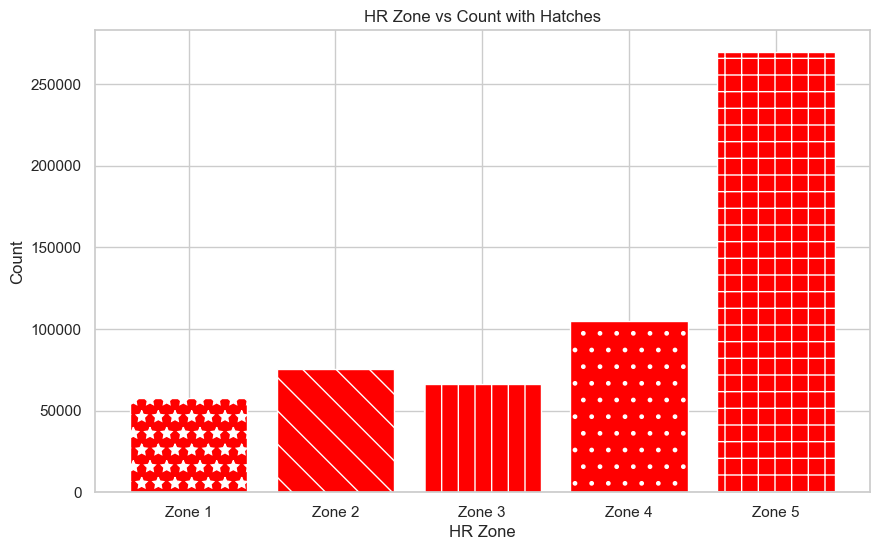

In [238]:
zones = {
    'Zone 1': test_m[test_m['HR'] < 100],
    'Zone 2': test_m[(test_m['HR'] >= 100) & (test_m['HR'] <= 120)],
    'Zone 3': test_m[(test_m['HR'] > 120) & (test_m['HR'] <= 135)],
    'Zone 4': test_m[(test_m['HR'] > 135) & (test_m['HR'] <= 155)],
    'Zone 5': test_m[test_m['HR'] > 155]
}

counts = {zone: len(data) for zone, data in zones.items()}
print(counts)


df = pd.DataFrame({
    'HR Zone': list(counts.keys()),
    'Count': list(counts.values())
})

hatches = ['*', '\\', '|', '.', '+']


plt.figure(figsize=(10, 6))
bars = plt.bar(df['HR Zone'], df['Count'], color='red')


for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.xlabel('HR Zone')
plt.ylabel('Count')
plt.title('HR Zone vs Count with Hatches')


plt.show()


Question:37

Who is the youngest athlete and how many tests did she take part in?

In [138]:
youngest_athlete = subject_i.loc[subject_i['Age'].idxmin()]

youngest_athlete_id = youngest_athlete['ID']
youngest_athlete_age = youngest_athlete['Age']
youngest_athlete_test_id = youngest_athlete['ID_test']

youngest_tests = test_m[test_m['ID_test'] == youngest_athlete_test_id]

num_tests = len(youngest_tests)

print(f"The youngest athlete ID is  {youngest_athlete_id}.")
print(f"Her age is {youngest_athlete_age}.")
print(f"She took part in {num_tests} tests.")


The youngest athlete ID is  543.
Her age is 10.8.
She took part in 676 tests.


In [ ]:
Question:38.

Plot the changes in HR and VO2 overtime for each ID_test. Add Trendline to compare HR and VO2 changes.

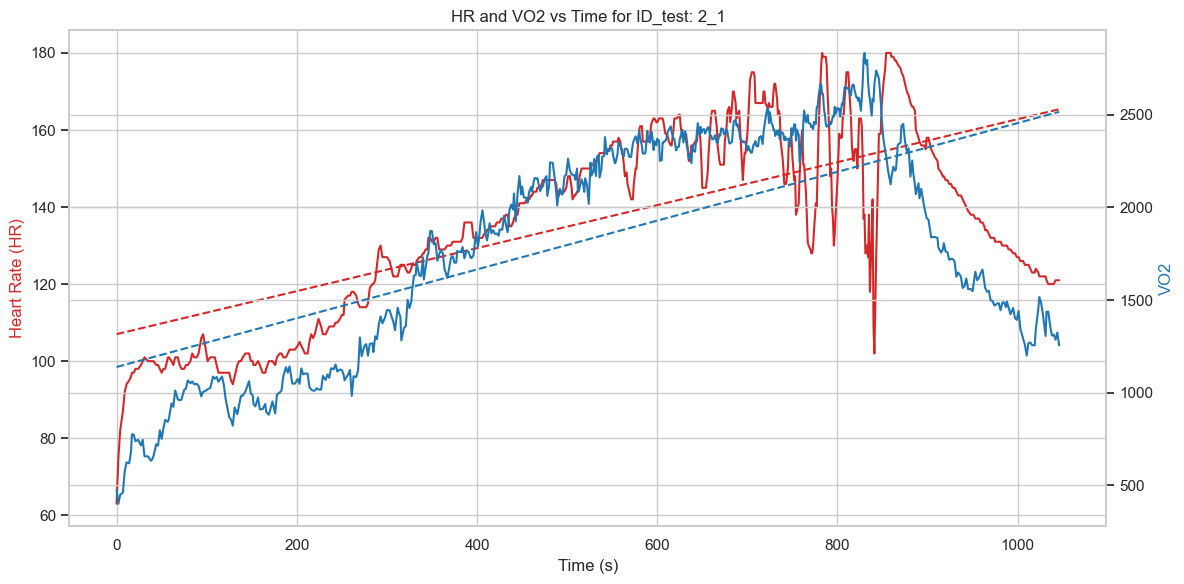

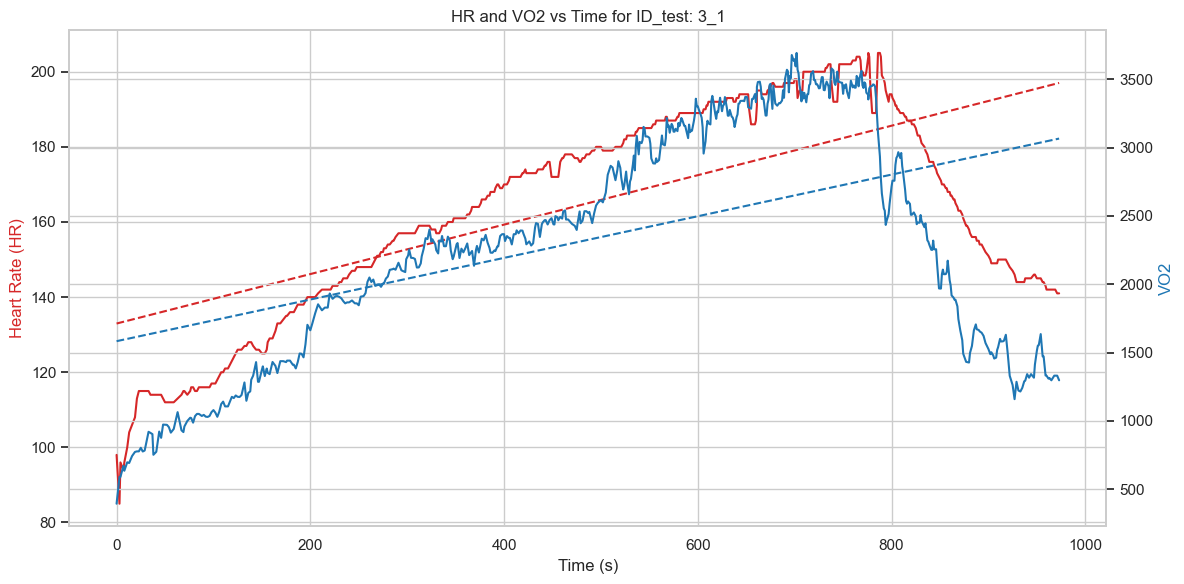

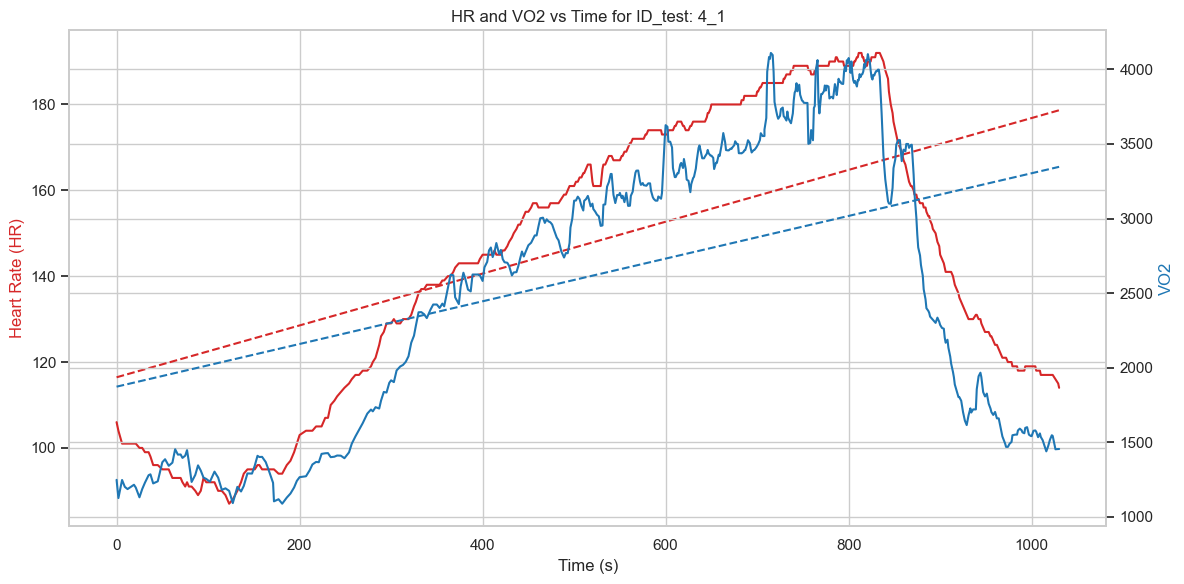

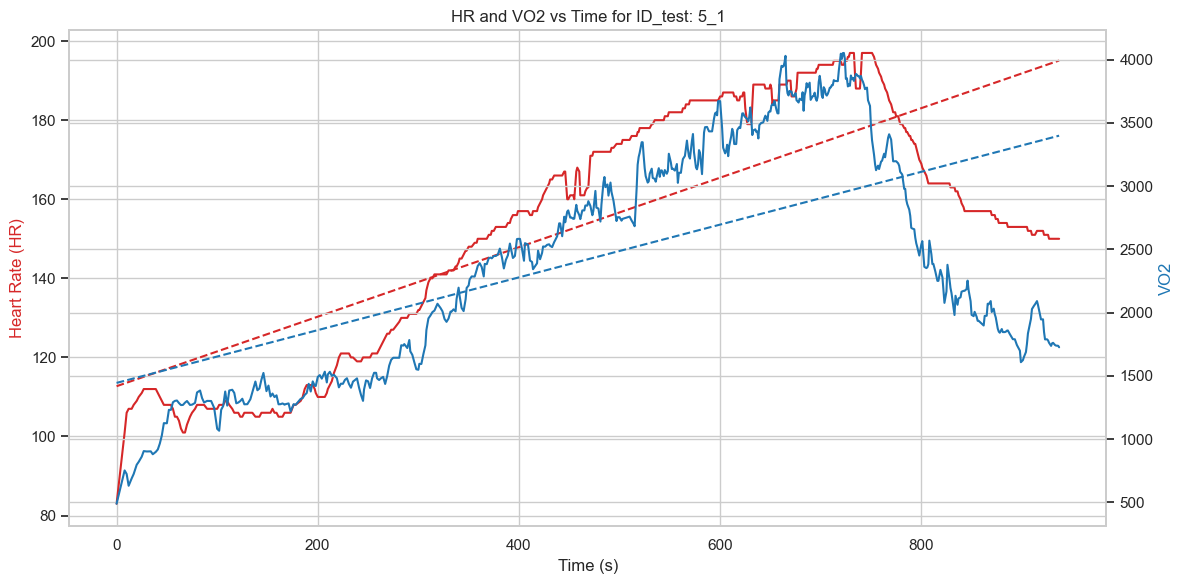

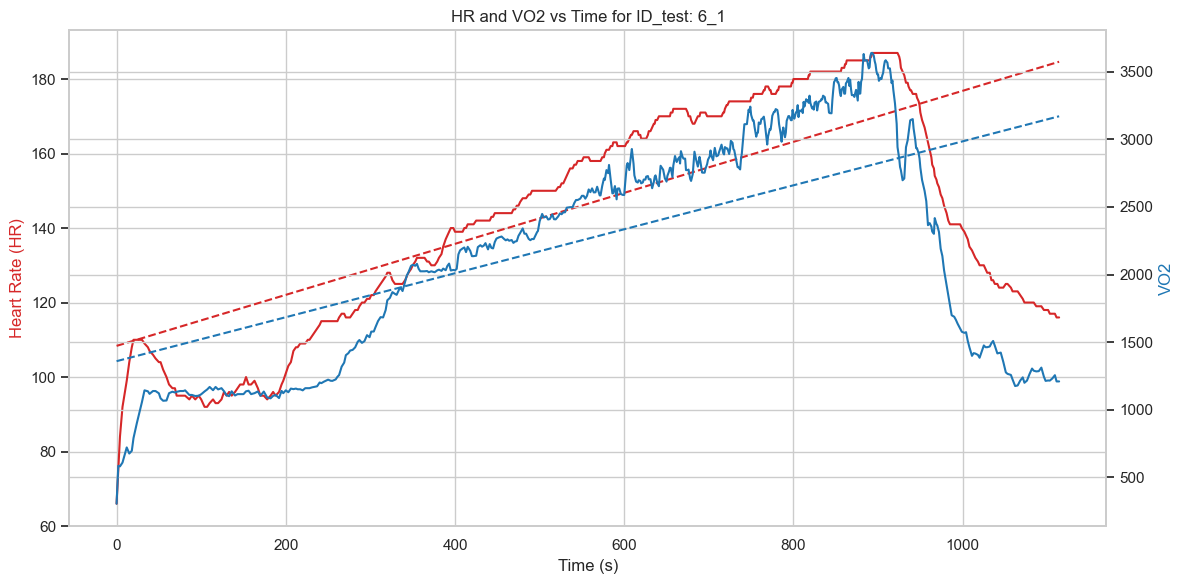

Plotting last 5 test IDs


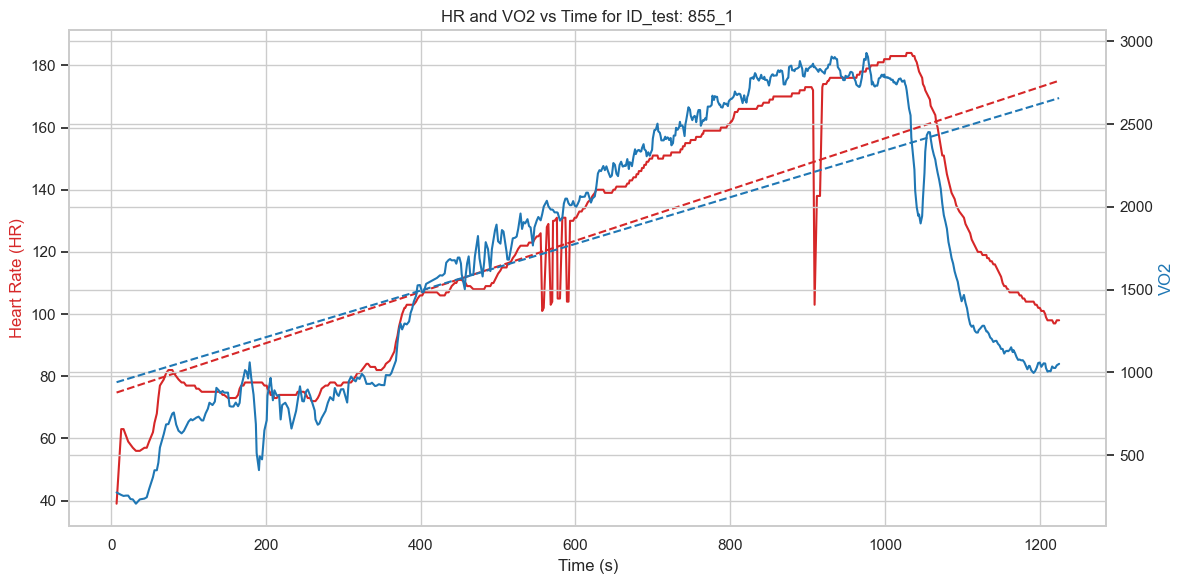

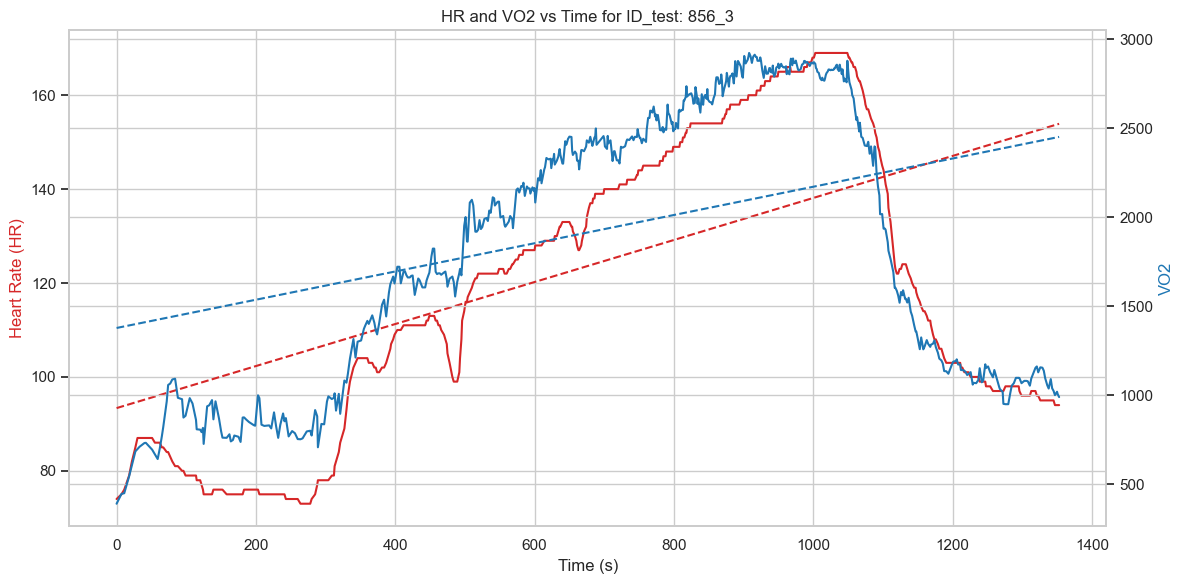

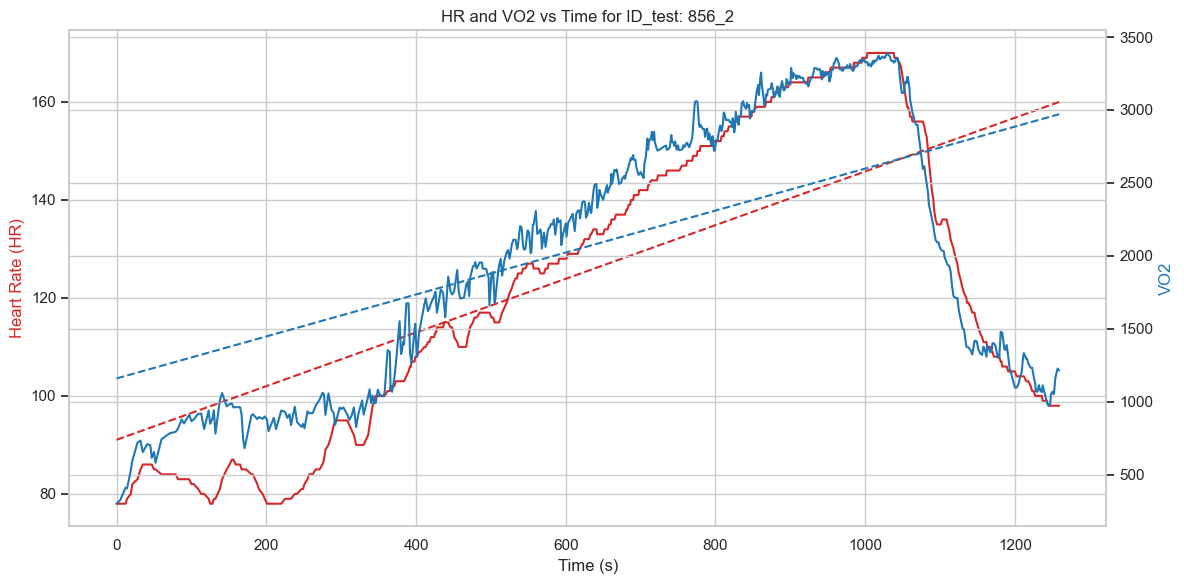

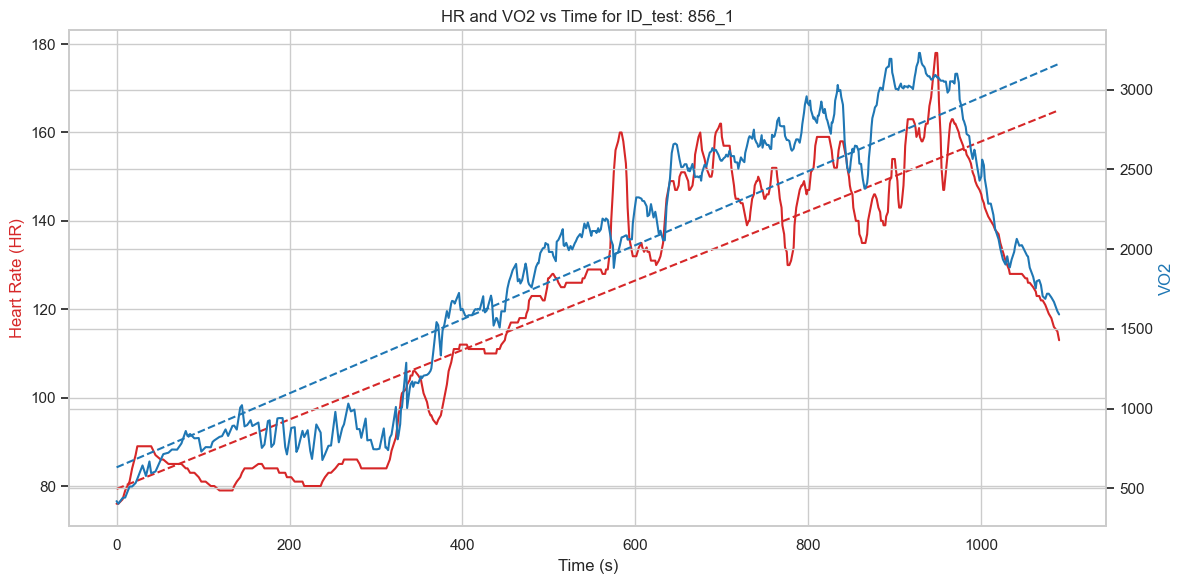

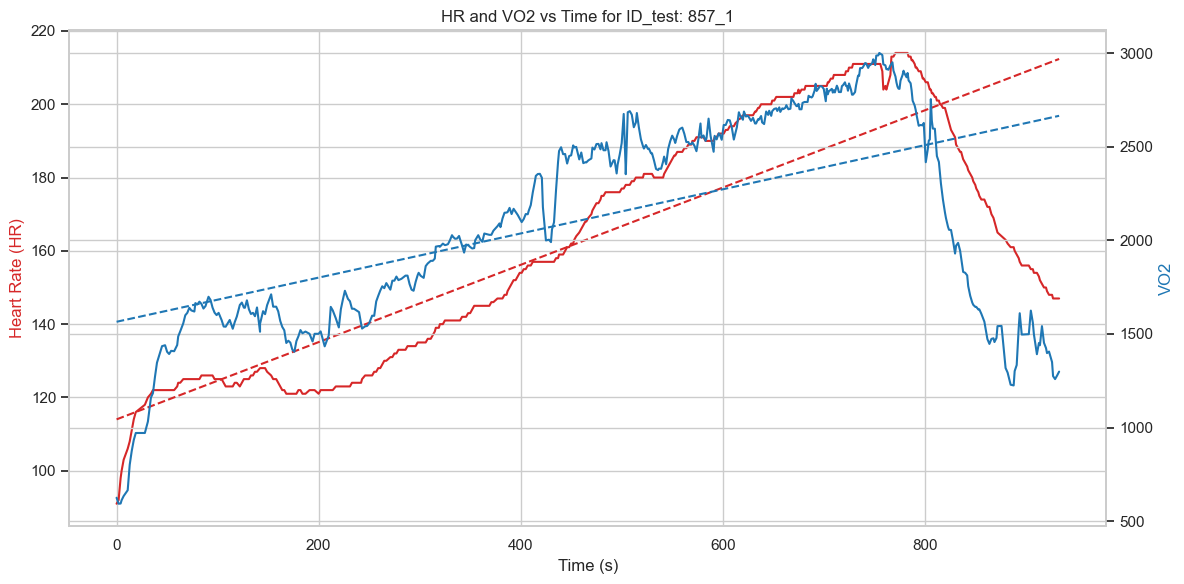

In [12]:

test_m = test_m.dropna(subset=['HR', 'VO2'])

# Set seaborn style
sns.set(style="whitegrid")

# Function to plot dual-axis chart with trend lines
def plot_dual_axis_with_trend(data, id_test, save_plot=False):
    subset = data[data['ID_test'] == id_test]
    if subset.empty:
        print(f"No valid data for ID_test: {id_test}")
        return

    time = subset['time']
    hr = subset['HR']
    vo2 = subset['VO2']

    fig, ax1 = plt.subplots(figsize=(12, 6))

    color1 = 'tab:red'
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Heart Rate (HR)', color=color1)
    ax1.plot(time, hr, color=color1, label='HR')
    z1 = np.polyfit(time, hr, 1)
    p1 = np.poly1d(z1)
    ax1.plot(time, p1(time), color=color1, linestyle='--', label='HR Trend')

    ax2 = ax1.twinx()
    color2 = 'tab:blue'
    ax2.set_ylabel('VO2', color=color2)
    ax2.plot(time, vo2, color=color2, label='VO2')
    z2 = np.polyfit(time, vo2, 1)
    p2 = np.poly1d(z2)
    ax2.plot(time, p2(time), color=color2, linestyle='--', label='VO2 Trend')

    plt.title(f"HR and VO2 vs Time for ID_test: {id_test}")
    fig.tight_layout()

    if save_plot:
        plt.savefig(f'plot_{id_test}.png')
        plt.close()
    else:
        plt.show()

# Plot only the first 5 unique test IDs
unique_tests = test_m['ID_test'].unique()
for id_test in unique_tests[:5]:  # Just 5 plots
    plot_dual_axis_with_trend(test_m, id_test)

# Last 5
print("Plotting last 5 test IDs")
for id_test in unique_tests[-5:]:
    plot_dual_axis_with_trend(test_m, id_test)



Question:39. 

Find the average HRV for individual athlets, using short-term varaiablity analysis (RMSSD) 

In [27]:
test_m = test_m.dropna(subset=['HR'])

test_m = test_m.sort_values(by=['ID', 'time'])

test_m['RR_interval'] = 60000 / test_m['HR']

def calculate_rmssd(rr_intervals):
    rr_diff = np.diff(rr_intervals)
    squared_diff = rr_diff ** 2
    rmssd = np.sqrt(np.mean(squared_diff))
    return rmssd if len(rr_diff) > 0 else np.nan  


rmssd_per_athlete = (
    test_m.groupby('ID')['RR_interval']
    .apply(lambda x: calculate_rmssd(x.values))
    .reset_index()
)


rmssd_per_athlete.columns = ['ID', 'Average_HRV_RMSSD_ms']

print(" Average HRV per Athlete:")
print(rmssd_per_athlete)


 Average HRV per Athlete:
      ID  Average_HRV_RMSSD_ms
0      1             31.051144
1      2             14.001345
2      3              5.840448
3      4              3.504801
4      5              6.152472
..   ...                   ...
852  853              4.066015
853  854             24.244265
854  855             74.623379
855  856             37.671150
856  857              3.010206

[857 rows x 2 columns]


Question:40.

Identify the test that took the longest time to complete

In [146]:
longest_test = test_m.loc[test_m['time'].idxmax()]
longest_test_id = longest_test['ID_test']
time_taken = longest_test['time']
print(f"The test that took the longest time ID_Test: {longest_test_id}")
print(f"Duration of the longest test: {time_taken} seconds")

The test that took the longest time ID_Test: 699_1
Duration of the longest test: 1712 seconds


Question:41. 

Perform an EDA of subject_info using YDATA Profiling

In [24]:
import pandas as pd
from ydata_profiling import ProfileReport


# Generate the EDA report (minimal=True skips interactive widgets, progress_bar=False removes loading messages)
profile = ProfileReport(subject_i, title="EDA Report of Subject-info", explorative=True, minimal=True, progress_bar=False)

# Save the report as an HTML file
profile.to_file("subject_i_EDA_Report.html")

print("✅ EDA report saved as 'subject_i_EDA_Report.html'")



100%|██████████| 8/8 [00:00<00:00, 356.59it/s]


✅ EDA report saved as 'subject_i_EDA_Report.html'


 # The EDA  report for the Subject-info.csv can be viewed in the below link.

👉 [Click to open EDA Report](subject_i_EDA_Report.html)

Question:42

How does respiration rate progress based on trendmill speed for different BMI levels?
Visualize this relationship and find which BMI level has the highest mean respiration rate?

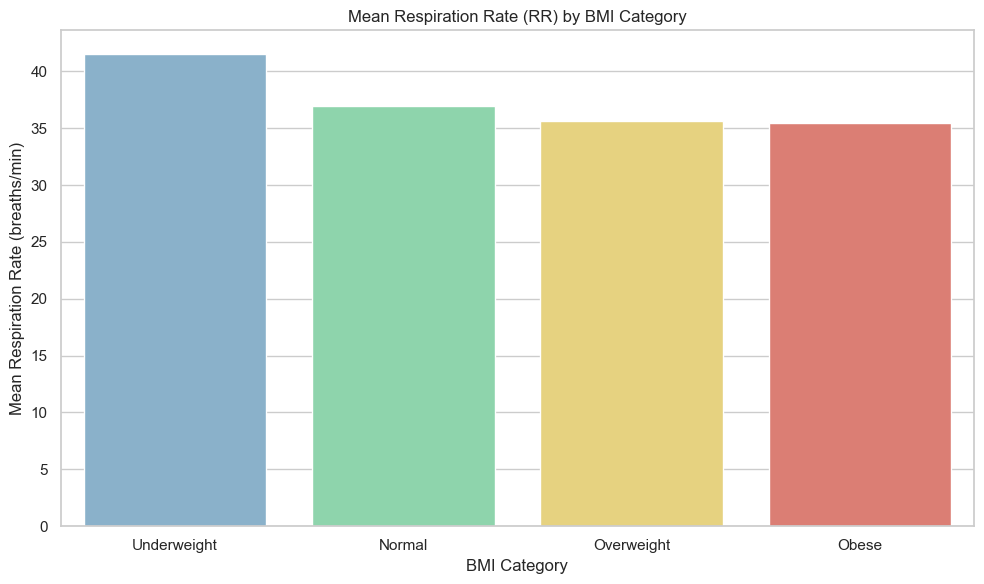


📈 Mean Respiration Rate by BMI Category:
  BMI_Category         RR
0  Underweight  41.527322
1       Normal  36.947823
2   Overweight  35.637972
3        Obese  35.439317

🏆 Highest Mean RR: Underweight (41.53 breaths/min)


In [222]:
sns.set(style="whitegrid")

# Calculate BMI
subject_i['Height_m'] = subject_i['Height'] / 100
subject_i['BMI'] = subject_i['Weight'] / (subject_i['Height_m'] ** 2)

def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

subject_i['BMI_Category'] = subject_i['BMI'].apply(bmi_category)
merged_df = pd.merge(test_m, subject_i[['ID', 'BMI_Category']], on='ID')
filtered_df = merged_df.dropna(subset=['RR', 'Speed'])

mean_rr_df = (
    filtered_df.groupby('BMI_Category')['RR']
    .mean()
    .reindex(['Underweight', 'Normal', 'Overweight', 'Obese'])  # for consistent order
    .reset_index()
)

bmi_palette = {
    'Underweight': '#7FB3D5',  # Light blue
    'Normal': '#82E0AA',       # Light green
    'Overweight': '#F7DC6F',   # Yellow
    'Obese': '#EC7063'         # Red/pink
}

plt.figure(figsize=(10, 6))
sns.barplot(
    data=mean_rr_df,
    x='BMI_Category',
    y='RR',
    hue='BMI_Category',
    palette=bmi_palette,
    dodge=False,
    legend=False
)

plt.title('Mean Respiration Rate (RR) by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Mean Respiration Rate (breaths/min)')
plt.tight_layout()
plt.show()


print("\n📈 Mean Respiration Rate by BMI Category:")
print(mean_rr_df)

highest = mean_rr_df.loc[mean_rr_df['RR'].idxmax()]
print(f"\n🏆 Highest Mean RR: {highest['BMI_Category']} ({highest['RR']:.2f} breaths/min)")


Question:43. 

Identify cases of possible bradycardia at rest and display number of athletes based on gender

In [29]:
resting_hr = test_m.groupby('ID_test')['HR'].min().reset_index()
resting_hr.rename(columns={'HR': 'Resting_HR'}, inplace=True)

bradycardia_df = resting_hr[resting_hr['Resting_HR'] < 60]

merged = pd.merge(bradycardia_df, subject_i[['ID_test', 'Sex']], left_on='ID_test', right_on='ID_test')

bradycardia_counts = merged['Sex'].value_counts()

print("Bradycardia Cases by Gender (Resting HR < 60 bpm):")
print(bradycardia_counts)

Bradycardia Cases by Gender (Resting HR < 60 bpm):
Sex
0    165
1     29
Name: count, dtype: int64


Question:44

Calculate the average heart rate corresponding to the speed of the treadmill and plot a line graph to visualize the relationship.

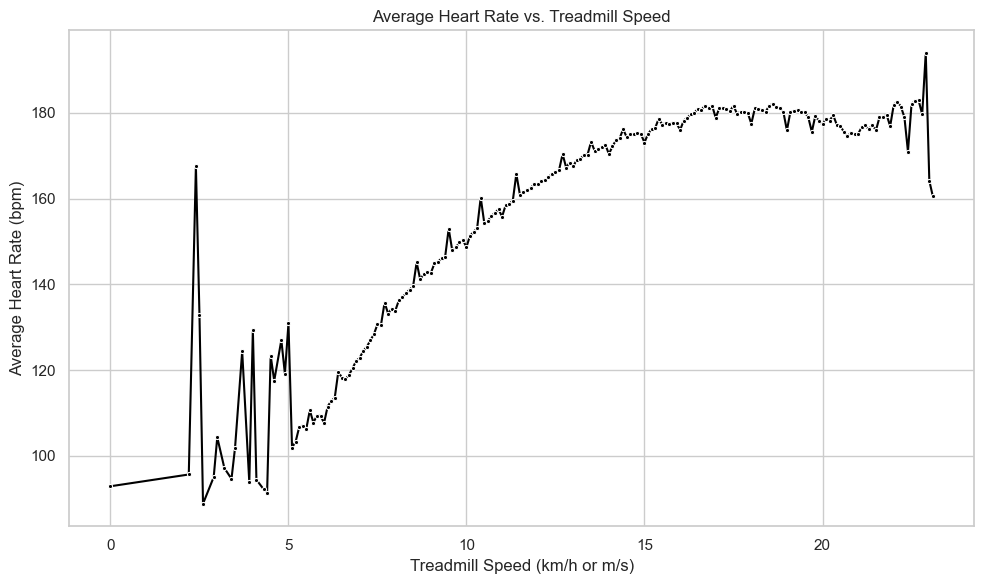

In [204]:
test_m = test_m.dropna(subset=['Speed', 'HR'])
avg_hr_by_speed = test_m.groupby('Speed')['HR'].mean().reset_index()
avg_hr_by_speed = avg_hr_by_speed.sort_values('Speed')
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_hr_by_speed, x='Speed', y='HR', marker='.', color='black')

plt.title('Average Heart Rate vs. Treadmill Speed')
plt.xlabel('Treadmill Speed (km/h or m/s)')
plt.ylabel('Average Heart Rate (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show()


Question:45

Analyze the trend of HR at the start of the test vs the middle and the end. What is the overall trend?


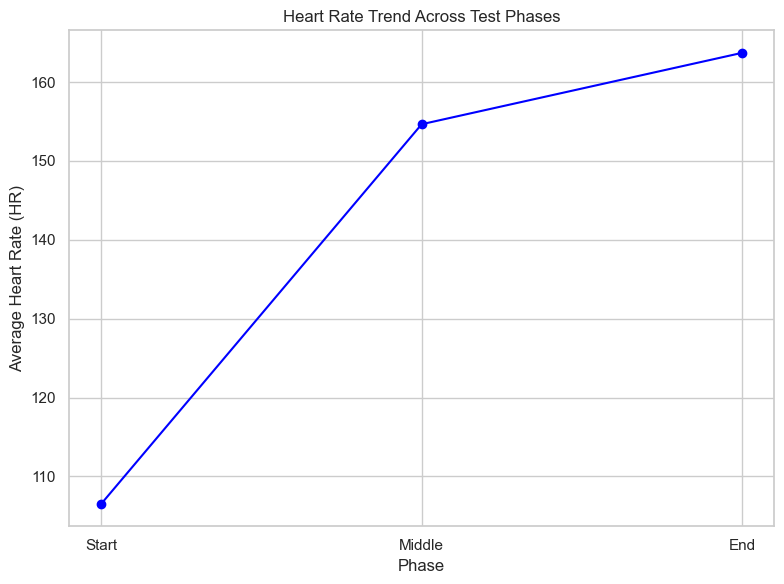

Heart Rate progression from Start to Middle to End phases typically reflects initial adaptation, peak exertion, and recovery.


In [170]:
id_col = test_m['ID_test']

def categorize_phase(group):
    duration = group['time'].max() - group['time'].min()
    group = group.copy()
    group['Phase'] = group['time'].apply(
        lambda t: 'Start' if t <= group['time'].min() + duration / 3 else
                  'Middle' if t <= group['time'].min() + 2 * duration / 3 else
                  'End'
    )
    return group

grouped = test_m[['ID_test', 'time', 'HR']].copy()
result = []

for id_test, group in grouped.groupby('ID_test'):
    categorized = categorize_phase(group)
    result.append(categorized)


test_m = pd.concat(result).reset_index(drop=True)

phase_avg_hr = test_m.groupby('Phase')['HR'].mean().reset_index()

phase_avg_hr['Phase'] = pd.Categorical(phase_avg_hr['Phase'], categories=['Start', 'Middle', 'End'], ordered=True)
phase_avg_hr = phase_avg_hr.sort_values('Phase')

plt.figure(figsize=(8, 6))
plt.plot(phase_avg_hr['Phase'], phase_avg_hr['HR'], marker='o', linestyle='-', color='blue')
plt.title('Heart Rate Trend Across Test Phases')
plt.xlabel('Phase')
plt.ylabel('Average Heart Rate (HR)')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Heart Rate progression from Start to Middle to End phases typically reflects initial adaptation, peak exertion, and recovery.")


Question:46. Find the oldest athlete in the dataset and determine the number of breaths recorded for the oldest athlete during the test.

In [47]:
oldest_age = subject_i['Age'].max()
oldest_athlete = subject_i[subject_i['Age'] == oldest_age]

oldest_ids = oldest_athlete['ID_test'].unique()

breath_counts = test_m[test_m['ID_test'].isin(oldest_ids)].shape[0]

print("Oldest Athlete Age:", oldest_age)
print("ID_test:", list(oldest_ids))
print("Number of breaths recorded during the test:", breath_counts)


Oldest Athlete Age: 63
ID_test: ['296_1']
Number of breaths recorded during the test: 345


Question:47. Assuming age is given for the current year (2025), list the partcipants born on leap year?

In [37]:
subject_i['birth_year'] = 2025 - subject_i['Age']

def is_leap_year(year):
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

leap_year_participants = subject_i[subject_i['birth_year'].apply(is_leap_year)]

print(leap_year_participants[['ID', 'Age', 'birth_year']])

      ID  Age  birth_year
3    284   13        2012
4    341   13        2012
5    341   13        2012
113  177   17        2008
114  303   17        2008
..   ...  ...         ...
977  653   53        1972
978  756   53        1972
984  389   57        1968
989  390   61        1964
990  596   61        1964

[252 rows x 3 columns]


Question:48  

  Use a pairplot to analyze the relationship between temperature, humidity, and VO2 max (ml/kg/min) across different fitness levels. Hint: Classify 'Fitness Level' as 'Low' if VO2 max (ml/kg/min) is below the median, otherwise classify as 'High'

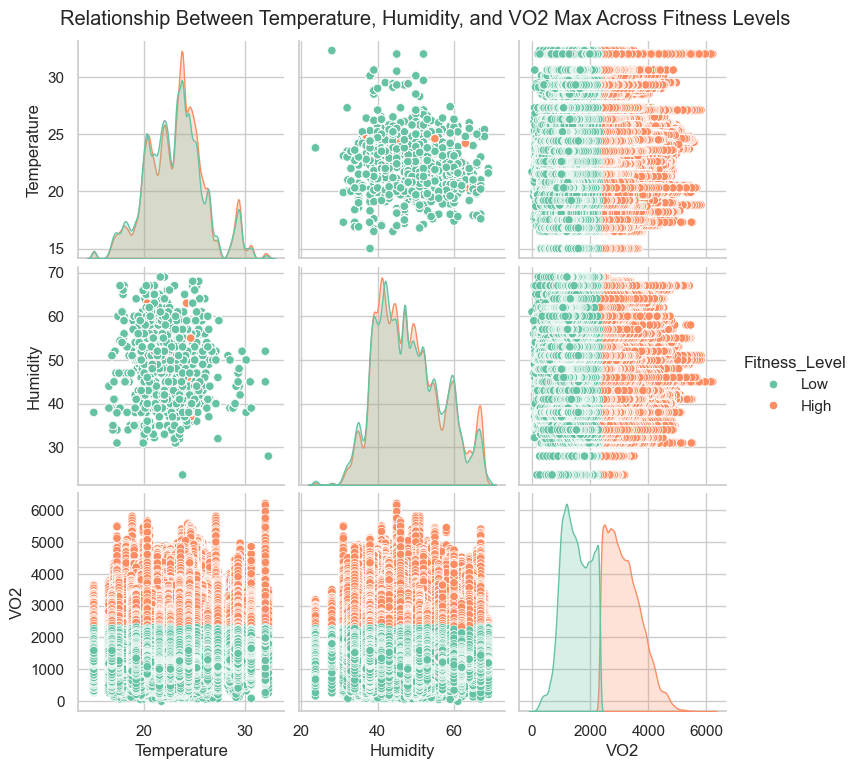

In [224]:

test_m = pd.read_csv('test_measure.csv')
subject_i = pd.read_csv('subject-info.csv')

merged_df = pd.merge(test_m, subject_i, on='ID')


median_vo2 = merged_df['VO2'].median()

merged_df['Fitness_Level'] = merged_df['VO2'].apply(
    lambda vo2: 'Low' if vo2 < median_vo2 else 'High'
)


pairplot_data = merged_df[['Temperature', 'Humidity', 'VO2', 'Fitness_Level']]

sns.pairplot(
    pairplot_data, 
    vars=['Temperature', 'Humidity', 'VO2'], 
    hue='Fitness_Level', 
    diag_kind='kde', 
    palette='Set2'
)

plt.suptitle("Relationship Between Temperature, Humidity, and VO2 Max Across Fitness Levels", y=1.02)
plt.show()
